<ipython-input-13-380f66ce74a4>:10: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Heatmap saved as 'accident_hotspots_heatmap.html'


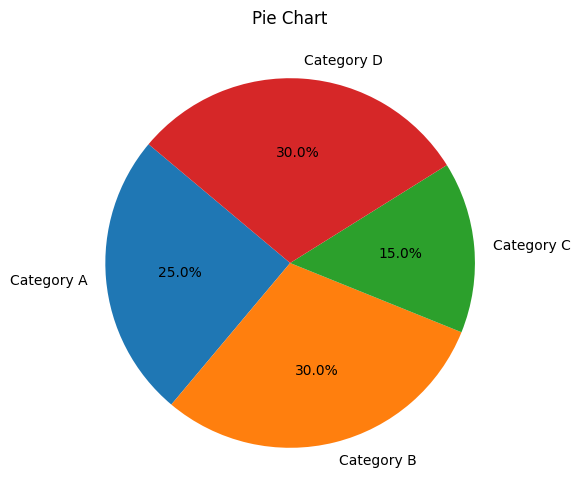

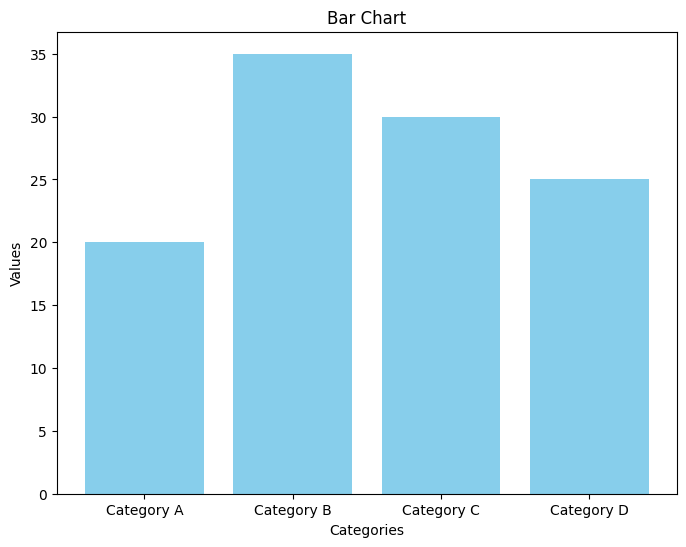

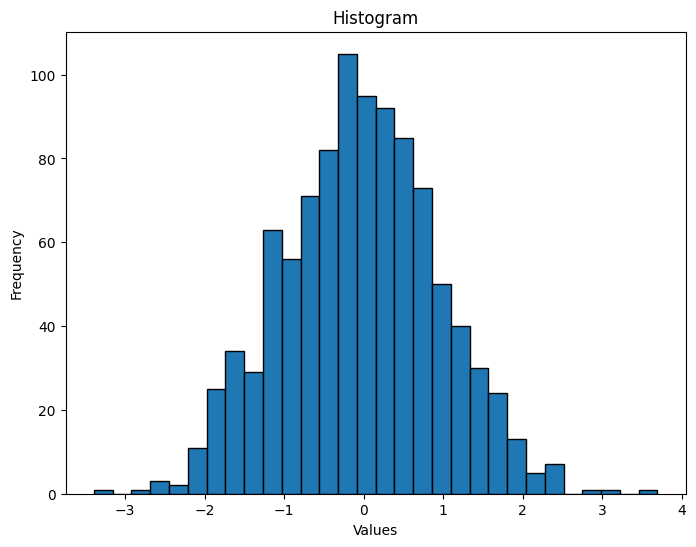

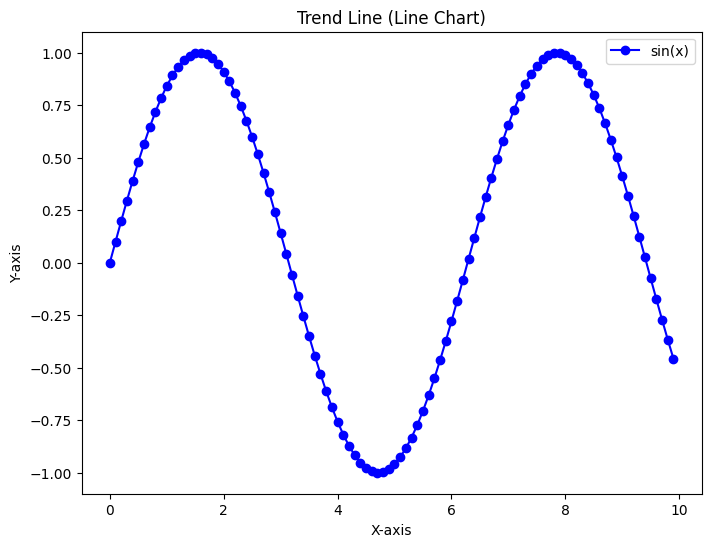

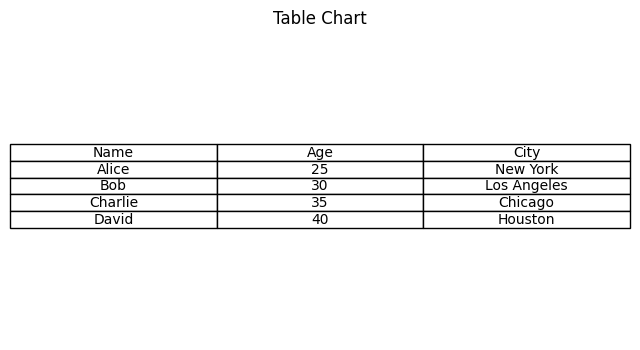

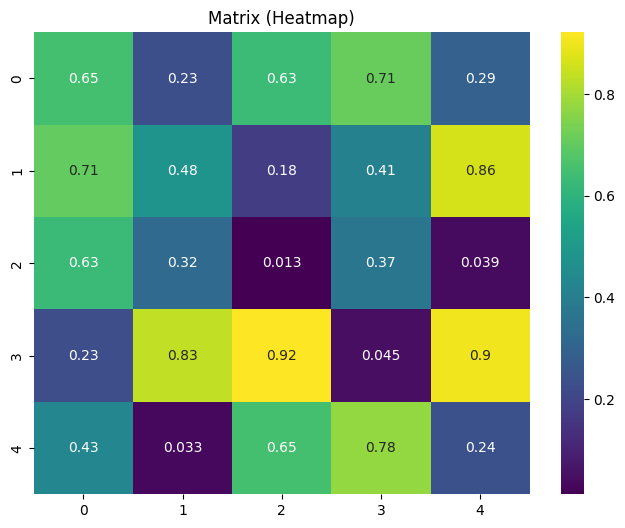

In [13]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
file_path = '/content/Crash_Reporting_-_Incidents_Data.csv'
data = pd.read_csv(file_path)

# Clean and preprocess data
data['Crash Date/Time'] = pd.to_datetime(data['Crash Date/Time'], errors='coerce')
data = data.dropna(subset=['Crash Date/Time', 'Latitude', 'Longitude', 'Road Condition'])

# Create HeatMap data
heat_data = data[['Latitude', 'Longitude']].dropna()

# Create base map centered at the mean of the data points
base_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

# Add HeatMap layer to the base map
HeatMap(heat_data, radius=10, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, blur=15, max_zoom=13).add_to(base_map)

# Add markers with popups for each data point
for index, row in data.iterrows():
    popup_text = f"Date/Time: {row['Crash Date/Time']}<br> Road Condition: {row['Road Condition']}"
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text).add_to(base_map)

# Add interactive legend
legend_html = """
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 120px; height: 90px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 ">
     &nbsp; <b>Legend</b> <br>
     &nbsp; 0.2 - 0.4 &nbsp; <i style="background: blue; opacity: 0.5"></i><br>
     &nbsp; 0.4 - 0.6 &nbsp; <i style="background: lime; opacity: 0.5"></i><br>
     &nbsp; 0.6 - 1.0 &nbsp; <i style="background: orange; opacity: 0.5"></i><br>
     &nbsp; 1.0 &nbsp; <i style="background: red; opacity: 0.5"></i><br>
      </div>
     """
base_map.get_root().html.add_child(folium.Element(legend_html))

# Save map to HTML
base_map.save('accident_hotspots_heatmap.html')

print("Heatmap saved as 'accident_hotspots_heatmap.html'")

# Additional Charts
# Pie Chart
plt.figure(figsize=(8, 6))
sizes = [25, 30, 15, 30]
labels = ['Category A', 'Category B', 'Category C', 'Category D']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart')
plt.savefig('pie_chart.png')  # Save pie chart as PNG
plt.show()

# Bar Chart
plt.figure(figsize=(8, 6))
values = [20, 35, 30, 25]
plt.bar(labels, values, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart')
plt.savefig('bar_chart.png')  # Save bar chart as PNG
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
data_hist = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(data_hist, bins=30, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.savefig('histogram.png')  # Save histogram as PNG
plt.show()

# Trend Line (Line Chart)
plt.figure(figsize=(8, 6))
x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.plot(x, y, marker='o', linestyle='-', color='b', label='sin(x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Trend Line (Line Chart)')
plt.legend()
plt.savefig('trend_line.png')  # Save line chart as PNG
plt.show()

# Table Chart (using pandas)
plt.figure(figsize=(8, 4))
data_table = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
              'Age': [25, 30, 35, 40],
              'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']}
df_table = pd.DataFrame(data_table)
plt.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')
plt.axis('off')
plt.title('Table Chart')
plt.savefig('table_chart.png')  # Save table chart as PNG
plt.show()

# Matrix (Heatmap) using seaborn
plt.figure(figsize=(8, 6))
data_matrix = np.random.rand(5, 5)
sns.heatmap(data_matrix, annot=True, cmap='viridis', cbar=True)
plt.title('Matrix (Heatmap)')
plt.savefig('matrix_heatmap.png')  # Save heatmap as PNG
plt.show()